In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer, StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns

In [152]:
df = pd.read_csv("Week2_2023.06.06_Lab1_marketing_customer_analysis_clean.csv")

In [153]:
df.shape

(10910, 26)

In [154]:
df = df.dropna()
df = df.reset_index(drop=True)

In [155]:
df.shape

(9134, 26)

In [6]:
# save numerical columns
dfNumeric = df._get_numeric_data()
#print(dfNumeric.shape)
#print(dfNumeric.columns)

# save categorical columns
dfCategorical = df.drop(list(dfNumeric.columns), axis=1, inplace=False)
#print(dfCategorical.shape)
#print(dfCategorical.columns)
#dfCategorical = df.drop([dfNumeric.columns], axis=1, inplace=False)

In [7]:
dfNumeric.columns

Index(['Unnamed: 0', 'customer lifetime value', 'income',
       'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'total claim amount', 'month'],
      dtype='object')

In [8]:
dfCategorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [9]:
dfNumeric = dfNumeric.drop("Unnamed: 0",axis=1)
y = dfNumeric["total claim amount"]
dfNumeric = dfNumeric.drop("total claim amount",axis=1)
dfNumeric = dfNumeric.reset_index(drop=True)

In [10]:
dfNumeric.head(3)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2


#### we want to predict the weight of the penguins based on the flipper length

In [11]:
X = dfNumeric

In [12]:
print(X.shape)
print(y.shape)
#y = pdfTarget

(9134, 8)
(9134,)


#### train-test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 8)
(2741, 8)
(6393,)
(2741,)


In [17]:
#dfCombined = dfCombined.dropna()
#dfCombined = dfCombined.reset_index(drop=True)

## 1. without transforming data

#### model generation

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#instantiating linear regression object
lm  = LinearRegression() # fit_intercept = True

In [19]:
# calculating the best fit by minimizing the loss function - calculating the model parameters - slope and intercept
model = lm.fit(X_train, y_train)

In [20]:
# model slope
print(model.coef_)
# model intercept
print(model.intercept_)# model slope
print(model.coef_)
# model intercept
print(model.intercept_)

[-3.03118930e-04 -3.30763445e-03  5.41199075e+00 -1.07933456e-02
 -1.19974470e-01 -2.90235442e+00 -1.23581957e-01  2.76969659e+00]
60.80130183052148


In [21]:
y_pred = model.predict(X_test)

In [118]:
#y_test - y_pred
compare = pd.DataFrame({"y_test":list(y_test), "y_pred":list(y_pred)})

In [119]:
compare

,y_test,y_pred
0,326.400000,342.123485
1,209.504391,621.104674
2,523.888845,367.453851
3,504.000000,329.940246
4,135.888306,449.976424
...,...,...
3079,330.782934,282.293920
3080,405.804184,453.081242
3081,648.000000,537.010494
3082,161.615740,930.786949


#### model evaluation

In [120]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [121]:
mse(y_test,y_pred)

40333.24857039886

In [122]:
mae(y_test,y_pred)

143.1337950424027

In [123]:
import matplotlib.pyplot as plt

In [127]:
print(type(y_pred))
print(type(y_test))
y_test_array = np.array(y_test)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [130]:
print(type(y_test_array))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


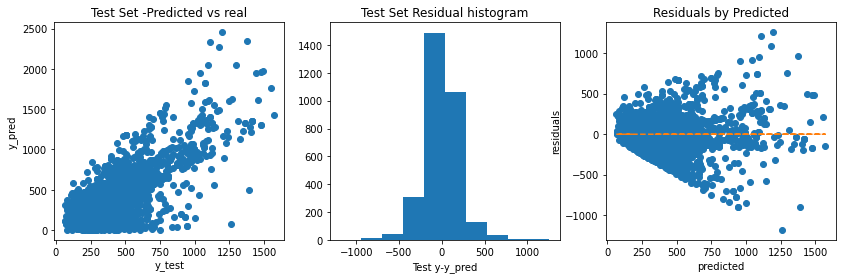

In [132]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_array, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_array - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_array - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## 2. with transforming data

#### run first cells in notebook to load data again and split data again.

In [18]:
# Create an instance of StandardScaler
ss = StandardScaler()

# Fit the StandardScaler to your data
ss.fit(X_train)

# Apply the power transform to your data
X_train_transformed = ss.transform(X_train)
X_test_transformed = ss.transform(X_test)

#plt.hist(varB)


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
#instantiating linear regression object
lm  = LinearRegression() # fit_intercept = True

In [21]:
# calculating the best fit by minimizing the loss function - calculating the model parameters - slope and intercept
model = lm.fit(X_train_transformed, y_train)

In [22]:
# model slope
print(model.coef_)
# model intercept
print(model.intercept_)

[-2.40580829e+00 -9.88719285e+01  1.81732331e+02  6.67759950e-02
 -2.17923961e+00 -2.04943583e+00 -2.26938523e-01 -8.39088902e-01]
436.31415573033


In [23]:
y_pred = model.predict(X_test_transformed)

In [24]:
#y_test - y_pred
compare = pd.DataFrame({"y_test":list(y_test), "y_pred":list(y_pred)})

In [25]:
compare

,y_test,y_pred
0,456.523850,641.416409
1,406.902001,227.254038
2,128.516525,162.122947
3,110.868874,170.182703
4,106.737787,198.275206
...,...,...
2736,532.800000,455.293304
2737,292.800000,327.561582
2738,528.200860,489.483644
2739,358.643521,384.484332


#### model evaluation

In [26]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [27]:
mse(y_test,y_pred)

40577.70371630833

In [28]:
mae(y_test,y_pred)

145.22352516530592

In [29]:
import matplotlib.pyplot as plt

In [30]:
print(type(y_pred))
print(type(y_test))
y_test_array = np.array(y_test)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [31]:
print(type(y_test_array))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


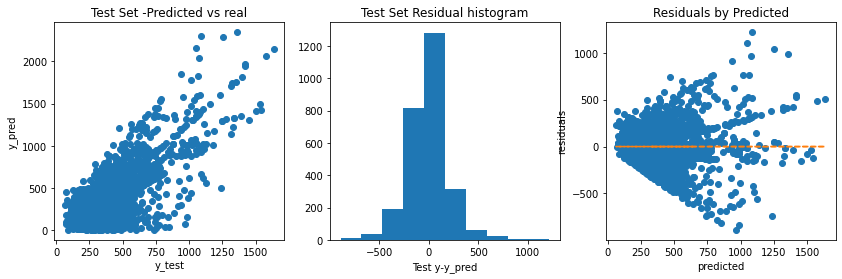

In [32]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_array, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_array - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_array - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## 3. with power transforming data - PERSISTENT NUMPY ERROR

#### run first cells in notebook to load data again and split data again.

In [78]:
# Create an instance of StandardScaler
pt = PowerTransformer()

# Fit the StandardScaler to your data
pt.fit(X_train)

# Apply the power transform to your data
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

#plt.hist(varB)


AttributeError: module 'numpy' has no attribute 'warnings'

In [278]:
from sklearn.linear_model import LinearRegression

In [279]:
#instantiating linear regression object
lm  = LinearRegression() # fit_intercept = True

In [280]:
# calculating the best fit by minimizing the loss function - calculating the model parameters - slope and intercept
model = lm.fit(X_train_transformed, y_train)

In [281]:
# model slope
print(model.coef_)
# model intercept
print(model.intercept_)

[-2.10452592e+00 -1.00642195e+02  1.84245289e+02 -1.09222651e-01
 -3.34650866e+00 -2.68156927e+00 -2.94761963e-01  1.38140394e+00]
433.6741637378007


In [282]:
y_pred = model.predict(X_test_transformed)

In [283]:
#y_test - y_pred
compare = pd.DataFrame({"y_test":list(y_test), "y_pred":list(y_pred)})

In [284]:
compare

,y_test,y_pred
0,326.400000,342.123485
1,209.504391,621.104674
2,523.888845,367.453851
3,504.000000,329.940246
4,135.888306,449.976424
...,...,...
3079,330.782934,282.293920
3080,405.804184,453.081242
3081,648.000000,537.010494
3082,161.615740,930.786949


#### model evaluation

In [285]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [286]:
mse(y_test,y_pred)

40333.24857039884

In [287]:
mae(y_test,y_pred)

143.13379504240277

In [288]:
import matplotlib.pyplot as plt

In [289]:
print(type(y_pred))
print(type(y_test))
y_test_array = np.array(y_test)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [290]:
print(type(y_test_array))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


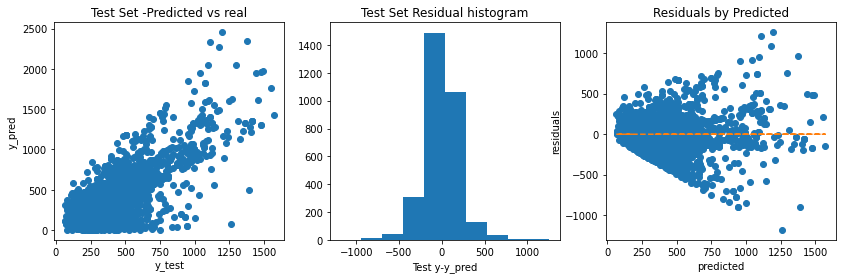

In [291]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_array, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_array - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_array - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

# Model Evaluation

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [35]:
dfCategorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

#### Feature importance

In [36]:
# model slope
print(model.coef_)
# model intercept
print(model.intercept_)

[-2.40580829e+00 -9.88719285e+01  1.81732331e+02  6.67759950e-02
 -2.17923961e+00 -2.04943583e+00 -2.26938523e-01 -8.39088902e-01]
436.31415573033


In [37]:
coefNames = list(X_train.columns)
coefValues = list(model.coef_)

In [38]:
coefdf = pd.DataFrame(
    {'Names': coefNames,
     'Values': coefValues
    })

In [39]:
coefdf.head

<bound method NDFrame.head of                            Names      Values
0        customer lifetime value   -2.405808
1                         income  -98.871929
2           monthly premium auto  181.732331
3        months since last claim    0.066776
4  months since policy inception   -2.179240
5      number of open complaints   -2.049436
6             number of policies   -0.226939
7                          month   -0.839089>

In [40]:
import matplotlib.pyplot as plt

<BarContainer object of 8 artists>

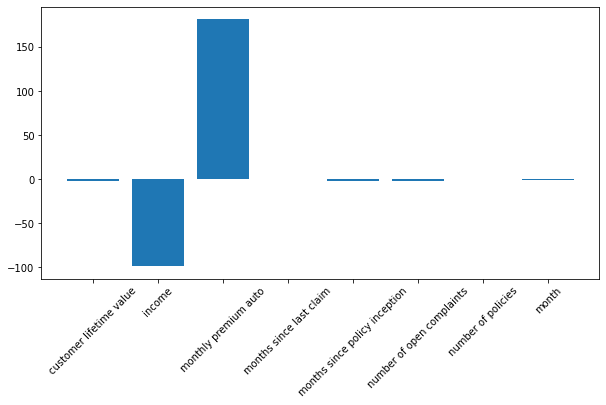

In [41]:
fig = plt.figure(figsize = (10, 5))
plt.xticks(rotation=45)
plt.bar(coefdf["Names"], coefdf["Values"])

# 3. Adding one hot encoded (for the categorical data) & categorical variables (for some of the numerical data)

In [42]:
dfCategorical.columns
dfCategorical.head
dfCategorical = dfCategorical.drop('effective to date', axis=1)
dfCategorical = dfCategorical.drop('customer', axis=1)

In [43]:
# Ordinal variables: coverage, education, policy, vehicle size
ordinal_variables = ["coverage", "education", "policy", "vehicle size"]
print(dfCategorical["coverage"].unique())
print(dfCategorical["education"].unique())
print(dfCategorical["policy"].unique())
print(dfCategorical["vehicle size"].unique())

['Basic' 'Extended' 'Premium']
['College' 'Bachelor' 'Doctor' 'High School or Below' 'Master']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L2' 'Personal L1'
 'Special L1' 'Corporate L1' 'Special L3' 'Special L2']
['Medsize' 'Small' 'Large']


nominal_variables = list(dfCategorical.columns)

for i in ordinal_variables:
    nominal_variables.remove(i)

In [44]:
nominal_variables = list(dfCategorical.columns)

In [45]:
# Perform one-hot encoding and drop original columns
for i in nominal_variables:
    encoded_columns = pd.get_dummies(dfCategorical[i], prefix=i, drop_first=True)
    encoded_columns = encoded_columns.astype(int)
    dfCategorical = pd.concat([dfCategorical, encoded_columns], axis=1)
    dfCategorical.drop(i, axis=1, inplace=True)

In [46]:
dfCategorical.shape

(9134, 43)

In [47]:
# change column data types
dfNumeric['number of open complaints'] = pd.Categorical(dfNumeric['number of open complaints'])
dfNumeric['number of policies'] = pd.Categorical(dfNumeric['number of policies'])
dfNumeric['month'] = pd.Categorical(dfNumeric['month'])

In [48]:
dfNumeric.shape

(9134, 8)

In [49]:
dfCategorical.shape

(9134, 43)

In [50]:
dfCombined = pd.concat([dfNumeric, dfCategorical], axis=1)

In [156]:
dfCombined.shape

(9134, 51)

dfCombined = dfCombined.drop("Unnamed: 0",axis=1)
y = dfCombined["total claim amount"]
dfCombined = dfCombined.drop("total claim amount",axis=1)
dfCombined = dfCombined.dropna()
dfCombined = dfCombined.reset_index(drop=True)

In [52]:
dfCombined.head

<bound method NDFrame.head of       customer lifetime value  income  monthly premium auto  \
0                 4809.216960   48029                    61   
1                 2228.525238       0                    64   
2                14947.917300   22139                   100   
3                22332.439460   49078                    97   
4                 5035.035257   37405                    63   
...                       ...     ...                   ...   
9129              2771.663013   59855                    74   
9130             19228.463620       0                   187   
9131              5259.444853   61146                    65   
9132             23893.304100   39837                   201   
9133             11971.977650   64195                   158   

      months since last claim  months since policy inception  \
0                         7.0                             52   
1                         3.0                             26   
2                    

#### get column names

In [142]:
columnNames = dfCombined.columns.values.tolist()
len(columnNames)

51

#### train-test split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
dfCombined.shape

(9134, 51)

##############################

In [160]:
X_train, X_test, y_train, y_test = train_test_split(dfCombined, y, test_size = 0.3, random_state=42)

In [161]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 51)
(2741, 51)
(6393,)
(2741,)


#### transforming data

##### Create an instance of PowerTransformer
pt = PowerTransformer()

##### Fit the StandardScaler to your data
pt.fit(X_train)

##### Apply the power transform to your data
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

#plt.hist(varB)


In [162]:
# Create an instance of StandardScaler
ss = StandardScaler()

# Fit the StandardScaler to your data
ss.fit(X_train)

# Apply the power transform to your data
X_train_transformed = ss.transform(X_train)
X_test_transformed = ss.transform(X_test)

#plt.hist(varB)


In [172]:
#X_train_transformed.shape
type(X_train_transformed)
X_train_transformed = pd.DataFrame(X_train_transformed)

##############################

In [193]:
type(X_train_transformed)
X_train_transformed.shape

(6393, 51)

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
#instantiating linear regression object
lm  = LinearRegression() # fit_intercept = True

In [196]:
# calculating the best fit by minimizing the loss function - calculating the model parameters - slope and intercept
model = lm.fit(X_train_transformed, y_train)

In [180]:
# model slope
print(model.coef_)
# model intercept
print(model.intercept_)

[ 5.36823582e-01 -5.36056611e+00  1.65447016e+02  3.20628466e+00
  1.17233427e+00 -1.84646768e+00  1.81867252e+00  2.18854993e-01
  3.22063234e-01  7.81408602e-01 -3.03098930e+00  4.66410728e-01
 -7.17831379e+00 -3.25305496e+00  8.81514155e-01 -1.99437193e-01
 -3.24636348e+00  5.58398097e+00 -1.72898182e+00 -6.83437895e+00
  4.71124314e+00 -1.23658718e+00  2.81160933e+01  7.18529702e+00
  1.82965045e+02  8.40496797e+01 -3.84494307e+00  2.58370015e+01
 -7.26481964e+14  5.34805778e+14  6.92263425e-01  7.02233020e-02
  5.57954796e+14  7.00556437e+14  8.02646553e+14 -2.27197564e+14
 -3.71815311e+14 -3.21913248e+14  1.04588621e+01  3.89830702e+00
  2.33101038e+00  1.31521406e+00  1.00126326e-01 -2.38549571e-01
  8.38184961e+00  8.90415663e+00  2.70111263e-01 -1.56406097e+00
 -8.98874831e-01 -2.15351857e+00  1.35136372e+00]
436.2801493933004


In [181]:
y_pred = model.predict(X_test_transformed)

In [182]:
#y_test - y_pred
compare = pd.DataFrame({"y_test":list(y_test), "y_pred":list(y_pred)})

In [183]:
compare

,y_test,y_pred
0,456.523850,546.141036
1,406.902001,347.160769
2,128.516525,-29.133357
3,110.868874,-33.616240
4,106.737787,-2.903146
...,...,...
2736,532.800000,556.467322
2737,292.800000,387.269849
2738,528.200860,473.758063
2739,358.643521,412.675130


#### model evaluation

In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # as mae as mse

In [74]:
#mse(y_test,y_pred)

In [75]:
#mae(y_test,y_pred)

In [185]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [186]:
print(mse)
print(rmse)
print(mae)
print(r2)

19058.70693786923
138.05327572306726
95.35114881749047
0.7778467891504457


In [76]:
import matplotlib.pyplot as plt

In [77]:
print(type(y_pred))
print(type(y_test))
y_test_array = np.array(y_test)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [78]:
print(type(y_test_array))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


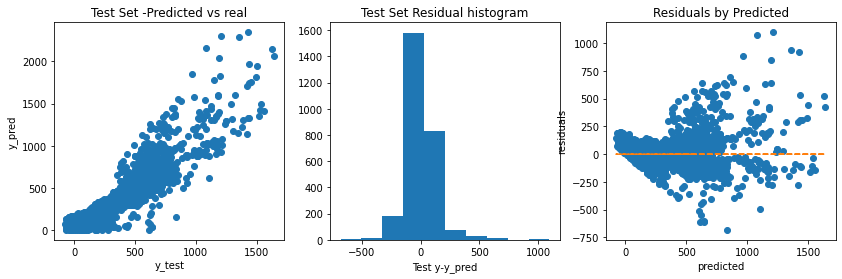

In [79]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_array, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_array - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_array - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [131]:
coefNames = list(X_train.columns)
coefValues = list(model.coef_)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [187]:
coefdf = pd.DataFrame(
    {'Names': coefNames,
     'Values': coefValues
    })

In [188]:
coefNames = list(X_train.columns)

In [82]:
coefdf.head

<bound method NDFrame.head of                              Names        Values
0          customer lifetime value  5.368236e-01
1                           income -5.360566e+00
2             monthly premium auto  1.654470e+02
3          months since last claim  3.206285e+00
4    months since policy inception  1.172334e+00
5        number of open complaints -1.846468e+00
6               number of policies  1.818673e+00
7                            month  2.188550e-01
8                 state_California  3.220632e-01
9                     state_Nevada  7.814086e-01
10                    state_Oregon -3.030989e+00
11                state_Washington  4.664107e-01
12                    response_Yes -7.178314e+00
13               coverage_Extended -3.253055e+00
14                coverage_Premium  8.815142e-01
15               education_College -1.994372e-01
16                education_Doctor -3.246363e+00
17  education_High School or Below  5.583981e+00
18                education_Master -1.7

In [83]:
import matplotlib.pyplot as plt

<BarContainer object of 51 artists>

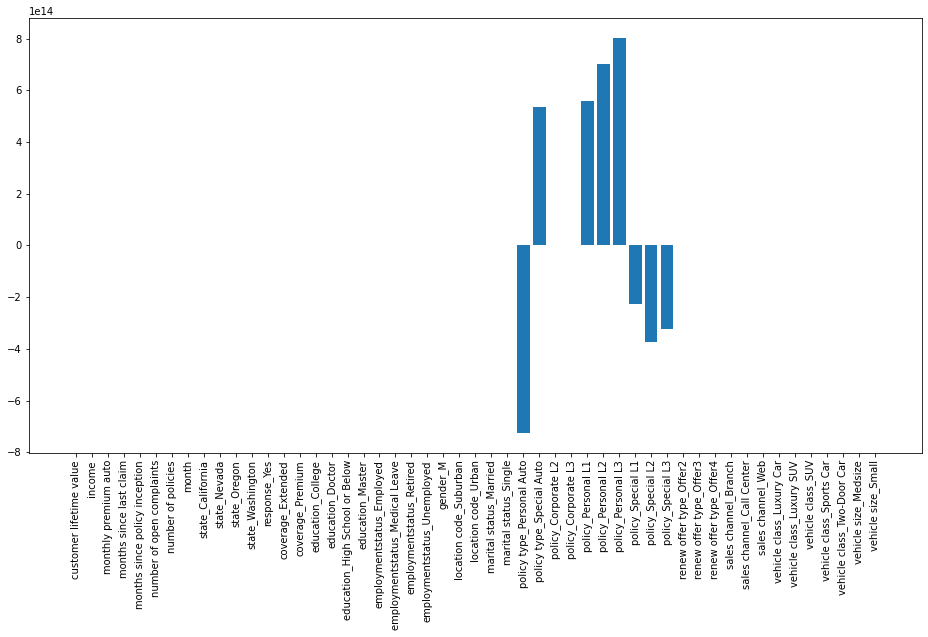

In [84]:
fig = plt.figure(figsize = (16, 8))
plt.xticks(rotation=90)
plt.bar(coefdf["Names"], coefdf["Values"])

In [85]:
# Recursive feature elimination

In [189]:
X_test_transformed.shape

(2741, 51)

In [190]:
X_test_transformed_df = pd.DataFrame(X_test_transformed)

In [191]:
X_test_transformed_df.shape

(2741, 51)

In [192]:
columnNames
X_test_transformed_df.shape

(2741, 51)

In [197]:
X_train_transformed_df = pd.DataFrame(X_train_transformed)

In [202]:
X_train_transformed_df.shape
X_train_transformed_df.columns = columnNames

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##X_train = X_train.select_dtypes(include=np.number)
##X_test  = X_test.select_dtypes(include=np.number)

##X_train = pd.DataFrame(X_train, columns=X.columns)
##X_test  = pd.DataFrame(X_test, columns=X.columns)

##X_train.isna().sum()
##nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
##nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
##cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

##X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
##X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)


#X_train_transformed, y_train
#X_test_transformed
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 0) # Step is how many features to add or drop everytime
selector.fit(X_train_transformed_df, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train_transformed_df.iloc[:,kept_features].columns)

X_train_transformed_dfRFE = selector.transform(X_train_transformed_df)
X_test_transformed_dfRFE  = selector.transform(X_test_transformed_df)

X_train_transformed_dfRFE = pd.DataFrame(X_train_transformed_df, columns=kept_features)
X_test_transformed_dfRFE  = pd.DataFrame(X_test_transformed_df, columns=kept_features)

print("Final selected features: ")
display(X_train_transformed_dfRFE)

E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


Final selected features: 


,policy type_Personal Auto,policy type_Special Auto,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3
0,0.592465,-0.20507,-0.387333,-0.551508,1.286858,-0.084195,-0.13948,-0.120166
1,-1.687864,-0.20507,-0.387333,-0.551508,-0.777087,-0.084195,-0.13948,-0.120166
2,0.592465,-0.20507,-0.387333,-0.551508,1.286858,-0.084195,-0.13948,-0.120166
3,0.592465,-0.20507,2.581757,-0.551508,-0.777087,-0.084195,-0.13948,-0.120166
4,0.592465,-0.20507,-0.387333,1.813209,-0.777087,-0.084195,-0.13948,-0.120166
...,...,...,...,...,...,...,...,...
6388,0.592465,-0.20507,-0.387333,1.813209,-0.777087,-0.084195,-0.13948,-0.120166
6389,-1.687864,-0.20507,-0.387333,-0.551508,-0.777087,-0.084195,-0.13948,-0.120166
6390,0.592465,-0.20507,-0.387333,-0.551508,1.286858,-0.084195,-0.13948,-0.120166
6391,0.592465,-0.20507,-0.387333,-0.551508,1.286858,-0.084195,-0.13948,-0.120166


In [ ]:
## Embedded Methods

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)
X_test = imp_mean.fit_transform(X_test)

In [206]:
## OLS

In [209]:
import numpy as np
from sklearn.impute import SimpleImputer
model=LinearRegression()
model.fit(X_train_transformed_df, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_transformed_df, y_train)}, Test -> {model.score(X_test_transformed_df, y_test)}")
# Penalty term set to 0, Lambda set to zero - potentially 

LinearRegression: Train -> 0.7692468461040518, Test -> 0.7778467891504457


E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<b> A lasso model can drop features and be a feature selection technique <b>

In [218]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=30) # = lambda, called alpha, because of lambda functions in python
# same accuracy as OLS, because alpha=0

model.fit(X_train_transformed_df, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_transformed_df, y_train)}, Test -> {model.score(X_test_transformed_df, y_test)}")

Lasso: Train -> 0.6897660684571737, Test -> 0.6983283435630276


E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


<b> Ridge

In [225]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Ridge(alpha=5000)
model.fit(X_train_transformed_df, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_transformed_df, y_train)}, Test -> {model.score(X_test_transformed_df, y_test)}")

Ridge: Train -> 0.6552948570368087, Test -> 0.6610273916245111


E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


<b> ElasticNet

In [228]:
model=ElasticNet(alpha=3)
model.fit(X_train_transformed_df, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_transformed_df, y_train)}, Test -> {model.score(X_test_transformed_df, y_test)}")

ElasticNet: Train -> 0.5700876819980858, Test -> 0.5749891775174306


E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [ ]:
LassoAlpha=30
RidgeAlpha=5000
ENAlpha=3

In [231]:
def regularization_methods(X_train_transformed_df, y_train, X_test_transformed_df, y_test, LassoAlpha, RidgeAlpha, ENAlpha):
    from sklearn.feature_selection import RFE  ## recursive feature elemination technique
    from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
    from sklearn.impute import SimpleImputer
    
    lm = LinearRegression()

    selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 0) # Step is how many features to add or drop everytime
    selector.fit(X_train_transformed_df, y_train)

    kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
    kept_features = list(X_train_transformed_df.iloc[:,kept_features].columns)

    X_train_transformed_dfRFE = selector.transform(X_train_transformed_df)
    X_test_transformed_dfRFE  = selector.transform(X_test_transformed_df)

    X_train_transformed_dfRFE = pd.DataFrame(X_train_transformed_df, columns=kept_features)
    X_test_transformed_dfRFE  = pd.DataFrame(X_test_transformed_df, columns=kept_features)

    print("Final selected features: ")
    display(X_train_transformed_dfRFE.head(3))
    
    ## OLS
    model=LinearRegression()
    model.fit(X_train_transformed_df, y_train)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train_transformed_df, y_train)}, Test -> {model.score(X_test_transformed_df, y_test)}")
    # Penalty term set to 0, Lambda set to zero - potentially
    
    ## L1 Lasso
    model=Lasso(alpha=LassoAlpha) # = lambda, called alpha, because of lambda functions in python
    # same accuracy as OLS, because alpha=0

    model.fit(X_train_transformed_df, y_train)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train_transformed_df, y_train)}, Test -> {model.score(X_test_transformed_df, y_test)}")
    
    ## L2 Ridge
    model=Ridge(alpha=RidgeAlpha)
    model.fit(X_train_transformed_df, y_train)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train_transformed_df, y_train)}, Test -> {model.score(X_test_transformed_df, y_test)}")

    ## ElasticNet
    model=ElasticNet(alpha=ENAlpha)
    model.fit(X_train_transformed_df, y_train)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train_transformed_df, y_train)}, Test -> {model.score(X_test_transformed_df, y_test)}")
    
    return()

In [232]:
regularization_methods(X_train_transformed_df, y_train, X_test_transformed_df, y_test, LassoAlpha, RidgeAlpha, ENAlpha)

Final selected features: 


E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


,policy type_Personal Auto,policy type_Special Auto,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3
0,0.592465,-0.20507,-0.387333,-0.551508,1.286858,-0.084195,-0.13948,-0.120166
1,-1.687864,-0.20507,-0.387333,-0.551508,-0.777087,-0.084195,-0.13948,-0.120166
2,0.592465,-0.20507,-0.387333,-0.551508,1.286858,-0.084195,-0.13948,-0.120166
3,0.592465,-0.20507,2.581757,-0.551508,-0.777087,-0.084195,-0.13948,-0.120166
4,0.592465,-0.20507,-0.387333,1.813209,-0.777087,-0.084195,-0.13948,-0.120166
...,...,...,...,...,...,...,...,...
6388,0.592465,-0.20507,-0.387333,1.813209,-0.777087,-0.084195,-0.13948,-0.120166
6389,-1.687864,-0.20507,-0.387333,-0.551508,-0.777087,-0.084195,-0.13948,-0.120166
6390,0.592465,-0.20507,-0.387333,-0.551508,1.286858,-0.084195,-0.13948,-0.120166
6391,0.592465,-0.20507,-0.387333,-0.551508,1.286858,-0.084195,-0.13948,-0.120166


LinearRegression: Train -> 0.7692468461040518, Test -> 0.7778467891504457
Lasso: Train -> 0.6897660684571737, Test -> 0.6983283435630276
Ridge: Train -> 0.6552948570368087, Test -> 0.6610273916245111
ElasticNet: Train -> 0.5700876819980858, Test -> 0.5749891775174306


E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
E:\Programs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


()